In [1]:
#Importing necessery libraries
import pandas as pd
import numpy as np
import re
import nltk
import matplotlib.pyplot as plt
import seaborn as sns
from nltk.corpus import stopwords
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Conv1D, GlobalMaxPooling1D, Dense, Dropout

In [2]:
# Downloading NLTK stopwords
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\anahi\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [3]:
# Loading the BBC news dataset
df = pd.read_csv("bbc_text_cls.csv")
df.head()

,text,labels
0,Ad sales boost Time Warner profit\n\nQuarterly...,business
1,Dollar gains on Greenspan speech\n\nThe dollar...,business
2,Yukos unit buyer faces loan claim\n\nThe owner...,business
3,High fuel prices hit BA's profits\n\nBritish A...,business
4,Pernod takeover talk lifts Domecq\n\nShares in...,business


In [4]:
# Making a function for cleaning the text
def clean_text(text):
    text = text.lower()
    text = re.sub(r"[^a-zA-Z\s]", "", text)
    return " ".join([w for w in text.split() if w not in stop_words])

df["clean_text"] = df["text"].apply(clean_text)

In [5]:
le = LabelEncoder()

In [6]:
df["label"] = le.fit_transform(df["labels"])

In [7]:
num_classes = df["label"].nunique()

In [8]:
# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(df["clean_text"], df["label"], test_size=0.2, stratify=df["label"], random_state=42)

In [9]:
MAX_WORDS = 20000

In [10]:
MAX_LEN = 300

In [11]:
# Tokenize and convert texts to sequences
tokenizer = Tokenizer(num_words=MAX_WORDS, oov_token="<OOV>")
tokenizer.fit_on_texts(X_train)

In [12]:
X_train_seq = tokenizer.texts_to_sequences(X_train)
X_test_seq = tokenizer.texts_to_sequences(X_test)

In [13]:
# Pad sequences
X_train_pad = pad_sequences(X_train_seq, maxlen=MAX_LEN, padding="post")
X_test_pad = pad_sequences(X_test_seq, maxlen=MAX_LEN, padding="post")

In [14]:
# One-hot encode 
y_train_cat = to_categorical(y_train, num_classes=num_classes)
y_test_cat = to_categorical(y_test, num_classes=num_classes)

In [15]:
# Defining 1D Convolutional Neural Network for classification
model = Sequential([
    Embedding(input_dim=MAX_WORDS, output_dim=128, input_length=MAX_LEN),
    Conv1D(128, 5, activation='relu'),
    GlobalMaxPooling1D(),
    Dropout(0.5),
    Dense(64, activation='relu'),
    Dense(num_classes, activation='softmax')])

C:\Users\anahi\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\core\embedding.py:97: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


In [16]:
# Compiling the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [17]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding (Embedding)                │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d (Conv1D)                      │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_max_pooling1d                 │ ?                           │               0 │
│ (GlobalMaxPooling1D)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ ?                           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [18]:
# Training the CNN model
history = model.fit(X_train_pad, y_train_cat, epochs=10, batch_size=32, validation_split=0.1)

Epoch 1/10
51/51 ━━━━━━━━━━━━━━━━━━━━ 9s 94ms/step - accuracy: 0.2134 - loss: 1.6063 - val_accuracy: 0.3764 - val_loss: 1.5176
Epoch 2/10
51/51 ━━━━━━━━━━━━━━━━━━━━ 4s 83ms/step - accuracy: 0.5294 - loss: 1.3511 - val_accuracy: 0.7697 - val_loss: 0.8824
Epoch 3/10
51/51 ━━━━━━━━━━━━━━━━━━━━ 4s 84ms/step - accuracy: 0.8178 - loss: 0.6404 - val_accuracy: 0.8539 - val_loss: 0.3916
Epoch 4/10
51/51 ━━━━━━━━━━━━━━━━━━━━ 4s 84ms/step - accuracy: 0.9492 - loss: 0.2092 - val_accuracy: 0.9157 - val_loss: 0.2438
Epoch 5/10
51/51 ━━━━━━━━━━━━━━━━━━━━ 6s 94ms/step - accuracy: 0.9857 - loss: 0.0899 - val_accuracy: 0.9326 - val_loss: 0.2020
Epoch 6/10
51/51 ━━━━━━━━━━━━━━━━━━━━ 5s 91ms/step - accuracy: 0.9945 - loss: 0.0445 - val_accuracy: 0.9326 - val_loss: 0.2065
Epoch 7/10
51/51 ━━━━━━━━━━━━━━━━━━━━ 4s 86ms/step - accuracy: 0.9950 - loss: 0.0309 - val_accuracy: 0.9326 - val_loss: 0.1815
Epoch 8/10
51/51 ━━━━━━━━━━━━━━━━━━━━ 4s 85ms/step - accuracy: 0.9997 - loss: 0.0196 - val_accuracy: 0.9494 - v

In [19]:
# Evaluating the model
loss, acc = model.evaluate(X_test_pad, y_test_cat)
print(f"Test Accuracy: {acc:.4f}")

14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.9718 - loss: 0.1063
Test Accuracy: 0.9663


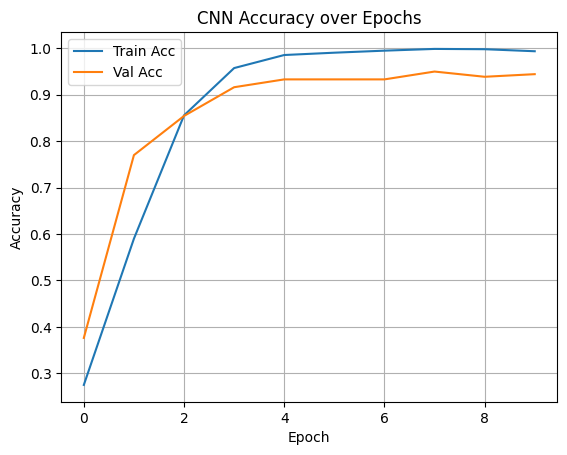

In [20]:
# Plotting the training 
plt.plot(history.history['accuracy'], label='Train Acc')
plt.plot(history.history['val_accuracy'], label='Val Acc')
plt.legend()
plt.title("CNN Accuracy over Epochs")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.grid()
plt.show()

In [21]:
from sklearn.metrics import classification_report, confusion_matrix

In [22]:
y_pred = model.predict(X_test_pad)

14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step


In [23]:
y_pred_labels = np.argmax(y_pred, axis=1)

In [24]:
y_true = np.argmax(y_test_cat, axis=1)

In [25]:
# Creating the confusion matrix
cm = confusion_matrix(y_true, y_pred_labels)

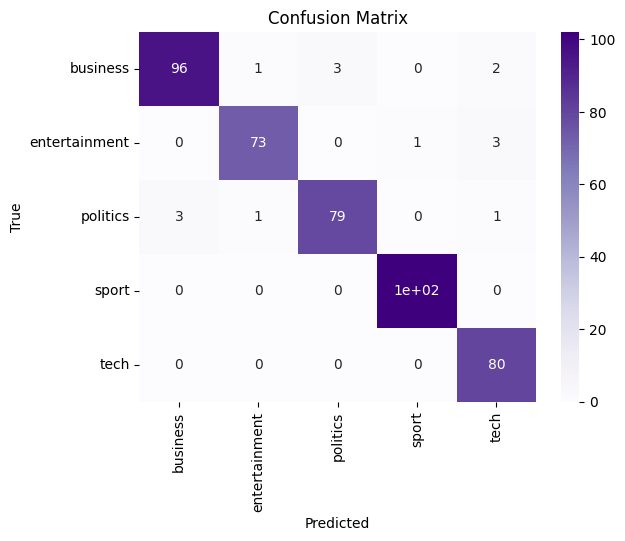

In [26]:
# visualizing the confusion matrix
sns.heatmap(cm, annot=True, cmap="Purples", xticklabels=le.classes_, yticklabels=le.classes_)
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix")
plt.show()

In [27]:
# Printing classification report
print(classification_report(y_true, y_pred_labels, target_names=le.classes_))

               precision    recall  f1-score   support

     business       0.97      0.94      0.96       102
entertainment       0.97      0.95      0.96        77
     politics       0.96      0.94      0.95        84
        sport       0.99      1.00      1.00       102
         tech       0.93      1.00      0.96        80

     accuracy                           0.97       445
    macro avg       0.97      0.97      0.97       445
 weighted avg       0.97      0.97      0.97       445

